In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка и первичный анализ данных

In [2]:
# Будем использовать выборку по вселенной Marvel
data = pd.read_csv('TMO LR2 Marvel.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(16376, 13)

In [4]:
# типы колонок
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 16376


# Обработка пропусков данных

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((16376, 13), (16376, 3))

Слишком много столбцов подверглось удалению

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((16376, 13), (58, 13))

Слишком много строк подверглось удалению

## Удаление столбцов с большим процентом пропусков данных (>10%)

In [10]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64' or dt=='object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 23.02%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 17.17%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 59.64%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 26.04%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 99.45%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 6.69%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.


In [11]:
# Удаление колонок, содержащих пустые значения
data_new = pd.read_csv('TMO LR2 Marvel.csv', sep=",")
del data_new['ID']
del data_new['ALIGN']
del data_new['EYE']
del data_new['HAIR']
del data_new['GSM']
(data.shape, data_new.shape)

((16376, 13), (16376, 8))

In [12]:
data_new.head()

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),Male Characters,Living Characters,2258.0,Nov-50,1950.0


In [13]:
# Проверим оставшиеся колонки
num_cols = []
for col in data_new.columns:
    # Количество пустых значений 
    temp_null_count = data_new[data_new[col].isnull()].shape[0]
    dt = str(data_new[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64' or dt=='object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 6.69%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.


In [14]:
# Проверим оставшиеся колонки
num_cols = []
for col in data_new.columns:
    # Количество пустых значений 
    temp_null_count = data_new[data_new[col].isnull()].shape[0]
    dt = str(data_new[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 6.69%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.


## Выберем только числовые столбцы в оставшейся выборке

In [15]:
# Фильтр по колонкам с пропущенными значениями
data_num = data_new[num_cols]
data_num

,APPEARANCES,Year
0,4043.0,1962.0
1,3360.0,1941.0
2,3061.0,1974.0
3,2961.0,1963.0
4,2258.0,1950.0
...,...,...
16371,NaN,NaN
16372,NaN,NaN
16373,NaN,NaN
16374,NaN,NaN


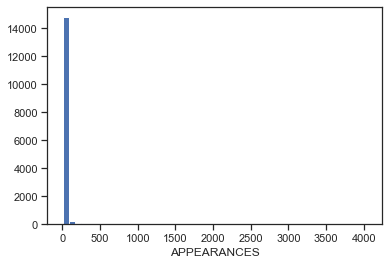

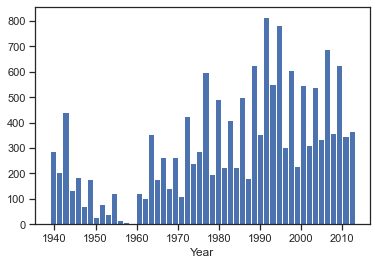

In [16]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data_new[col], 50)
    plt.xlabel(col)
    plt.show()

## Проанализируем каким способом заполнить пропуски данных в столбце APPEARANCES

In [17]:
data_num_Appearances = data_num[['APPEARANCES']]
data_num_Appearances.head()

,APPEARANCES
0,4043.0
1,3360.0
2,3061.0
3,2961.0
4,2258.0


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [19]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Appearances)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [20]:
strategies=['mean', 'median', 'most_frequent']

In [21]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Appearances)
    return data_num_imp[mask_missing_values_only]

In [22]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([17.03337696, 17.03337696, 17.03337696, ..., 17.03337696,
        17.03337696, 17.03337696]))

In [23]:
strategies[1], test_num_impute(strategies[1])

('median', array([3., 3., 3., ..., 3., 3., 3.]))

In [24]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([1., 1., 1., ..., 1., 1., 1.]))

Пропуски из столбца Appearances заполним самым часто встречающимся значением ('most_frequent')

In [25]:
data_new['APPEARANCES'] = data_new['APPEARANCES'].fillna(value = 1)
data_new

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),Male Characters,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),Male Characters,Living Characters,1.0,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),Male Characters,Living Characters,1.0,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Male Characters,Living Characters,1.0,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Male Characters,Living Characters,1.0,NaN,NaN


## Проанализируем каким способом заполнить пропуски данных в столбце Year

In [26]:
data_num_Year = data_num[['Year']]
data_num_Year.head()

,Year
0,1962.0
1,1941.0
2,1974.0
3,1963.0
4,1950.0


In [27]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Year)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [28]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Year)
    return data_num_imp[mask_missing_values_only]

In [29]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1

In [30]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 19

In [31]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 19

Пропуски из столбца Year заполним медианным значением ('median'), так как на гистограмме есть большые перепады значений

In [32]:
data_new['Year'] = data_new['Year'].fillna(value = 1990)
data_new

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),Male Characters,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),Male Characters,Living Characters,1.0,NaN,1990.0
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),Male Characters,Living Characters,1.0,NaN,1990.0
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Male Characters,Living Characters,1.0,NaN,1990.0
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Male Characters,Living Characters,1.0,NaN,1990.0


## Проверим остались ли пропуски в числовых данных

In [33]:
num_cols = []
for col in data_new.columns:
    # Количество пустых значений 
    temp_null_count = data_new[data_new[col].isnull()].shape[0]
    dt = str(data_new[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Видим, что пропусков нет

## Выберем категориальные признаки

In [34]:
num_cols = []
for col in data_new.columns:
    # Количество пустых значений 
    temp_null_count = data_new[data_new[col].isnull()].shape[0]
    dt = str(data_new[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.


Найдём самые часто встречающиеся значения в каждой из этих колонок и заполним пропуски.
## Заполним пропуски в категориальных столбцах

In [35]:
cat_temp_data = data[['SEX']]
cat_temp_data.head()

,SEX
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters


In [36]:
cat_temp_data['SEX'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters', nan], dtype=object)

In [37]:
cat_temp_data[cat_temp_data['SEX'].isnull()].shape

(854, 1)

In [38]:
# Импьютация наиболее частыми значениями
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp1 = imp1.fit_transform(cat_temp_data)
data_imp1

array([['Male Characters'],
       ['Male Characters'],
       ['Male Characters'],
       ...,
       ['Male Characters'],
       ['Male Characters'],
       ['Male Characters']], dtype=object)

In [39]:
data_new['SEX'] = data_new['SEX'].fillna(value = 'Male Characters')
data_new

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),Male Characters,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),Male Characters,Living Characters,1.0,NaN,1990.0
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),Male Characters,Living Characters,1.0,NaN,1990.0
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Male Characters,Living Characters,1.0,NaN,1990.0
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Male Characters,Living Characters,1.0,NaN,1990.0


In [40]:
cat_temp_data = data[['ALIVE']]
cat_temp_data.head()

,ALIVE
0,Living Characters
1,Living Characters
2,Living Characters
3,Living Characters
4,Living Characters


In [41]:
cat_temp_data['ALIVE'].unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [42]:
cat_temp_data[cat_temp_data['ALIVE'].isnull()].shape

(3, 1)

In [43]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Living Characters'],
       ['Living Characters'],
       ['Living Characters'],
       ...,
       ['Living Characters'],
       ['Living Characters'],
       ['Living Characters']], dtype=object)

In [44]:
data_new['ALIVE'] = data_new['ALIVE'].fillna(value = 'Living Characters')
data_new

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),Male Characters,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),Male Characters,Living Characters,1.0,NaN,1990.0
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),Male Characters,Living Characters,1.0,NaN,1990.0
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Male Characters,Living Characters,1.0,NaN,1990.0
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Male Characters,Living Characters,1.0,NaN,1990.0


In [45]:
cat_temp_data = data[['FIRST APPEARANCE']]
cat_temp_data.head()

,FIRST APPEARANCE
0,Aug-62
1,Mar-41
2,Oct-74
3,Mar-63
4,Nov-50


In [46]:
cat_temp_data[cat_temp_data['FIRST APPEARANCE'].isnull()].shape

(815, 1)

In [47]:
# Импьютация наиболее частыми значениями
imp3 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Aug-62'],
       ['Mar-41'],
       ['Oct-74'],
       ...,
       ['Jun-92'],
       ['Jun-92'],
       ['Jun-92']], dtype=object)

In [48]:
data_new['FIRST APPEARANCE'] = data_new['FIRST APPEARANCE'].fillna(value = 'Jun-92')
data_new

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),Male Characters,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),Male Characters,Living Characters,1.0,Jun-92,1990.0
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),Male Characters,Living Characters,1.0,Jun-92,1990.0
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Male Characters,Living Characters,1.0,Jun-92,1990.0
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Male Characters,Living Characters,1.0,Jun-92,1990.0


# Проверим есть ли пропущенные значения

In [49]:
data_new.isnull().sum()

page_id             0
name                0
urlslug             0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
Year                0
dtype: int64

# Выполним кодирование категориальных признаков целочисленными значениями - label encoding

In [50]:
cat_enc = pd.DataFrame({'c1':data_imp3.T[0]})
cat_enc

,c1
0,Aug-62
1,Mar-41
2,Oct-74
3,Mar-63
4,Nov-50
...,...
16371,Jun-92
16372,Jun-92
16373,Jun-92
16374,Jun-92


In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [52]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [53]:
cat_enc['c1'].unique()

array(['Aug-62', 'Mar-41', 'Oct-74', 'Mar-63', 'Nov-50', 'Nov-61',
       'May-62', 'Sep-63', 'Jun-92', 'May-75', 'Sep-64', 'Apr-64',
       'Jul-63', 'Jun-65', 'Jan-62', 'Mar-64', 'May-63', 'Jun-63',
       'Oct-68', 'Jan-80', 'Mar-68', 'Feb-80', 'Feb-74', 'Jun-72',
       'Oct-70', 'Aug-67', 'Oct-65', 'Jul-62', 'Dec-76', 'Mar-66',
       'Jul-64', 'Oct-64', 'Nov-82', 'Jul-90', 'May-74', 'Jan-86',
       'Nov-64', 'Mar-69', 'Nov-44', 'Oct-39', 'Aug-49', 'Oct-76',
       'Jan-79', 'Dec-65', 'Sep-69', 'Jul-67', 'Oct-62', 'Feb-91',
       'Dec-67', 'Nov-68', 'Feb-77', 'Aug-72', 'May-89', 'Aug-65',
       'Aug-75', 'Mar-65', 'Aug-77', 'Aug-41', 'Jan-67', 'Sep-40',
       'Apr-63', 'Sep-76', 'Apr-78', 'Jun-71', 'Dec-70', 'May-84',
       'Nov-86', 'Nov-72', 'Dec-75', 'Jul-79', 'Jul-65', 'Apr-05',
       'Jul-78', 'Jan-73', 'Dec-45', 'Jun-84', 'May-85', 'Sep-86',
       'Dec-64', 'Dec-68', 'Nov-85', 'Apr-79', 'May-90', 'Mar-92',
       'Feb-73', 'Dec-73', 'Nov-62', 'Sep-88', 'Jul-75', 'Jan-

In [54]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [55]:
cat_enc_le

array([ 99, 503, 738, ..., 480, 480, 480])

In [56]:
data_new['FIRST APPEARANCE'] = cat_enc_le
data_new

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Male Characters,Living Characters,4043.0,99,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Male Characters,Living Characters,3360.0,503,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Male Characters,Living Characters,3061.0,738,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Male Characters,Living Characters,2961.0,521,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),Male Characters,Living Characters,2258.0,649,1950.0
...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),Male Characters,Living Characters,1.0,480,1990.0
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),Male Characters,Living Characters,1.0,480,1990.0
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Male Characters,Living Characters,1.0,480,1990.0
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Male Characters,Living Characters,1.0,480,1990.0


In [57]:
cat_enc = pd.DataFrame({'c1':data_imp1.T[0]})
cat_enc

,c1
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters
...,...
16371,Male Characters
16372,Male Characters
16373,Male Characters
16374,Male Characters


In [58]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [59]:
cat_enc['c1'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters'], dtype=object)

In [60]:
np.unique(cat_enc_le)

array([0, 1, 2, 3])

In [61]:
data_new['SEX'] = cat_enc_le
data_new

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),3,Living Characters,4043.0,99,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),3,Living Characters,3360.0,503,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),3,Living Characters,3061.0,738,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),3,Living Characters,2961.0,521,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),3,Living Characters,2258.0,649,1950.0
...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),3,Living Characters,1.0,480,1990.0
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),3,Living Characters,1.0,480,1990.0
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),3,Living Characters,1.0,480,1990.0
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),3,Living Characters,1.0,480,1990.0


In [62]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Living Characters
1,Living Characters
2,Living Characters
3,Living Characters
4,Living Characters
...,...
16371,Living Characters
16372,Living Characters
16373,Living Characters
16374,Living Characters


In [63]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [64]:
cat_enc['c1'].unique()

array(['Living Characters', 'Deceased Characters'], dtype=object)

In [65]:
np.unique(cat_enc_le)

array([0, 1])

In [66]:
data_new['ALIVE'] = cat_enc_le
data_new

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),3,1,4043.0,99,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),3,1,3360.0,503,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),3,1,3061.0,738,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),3,1,2961.0,521,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),3,1,2258.0,649,1950.0
...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),3,1,1.0,480,1990.0
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),3,1,1.0,480,1990.0
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),3,1,1.0,480,1990.0
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),3,1,1.0,480,1990.0


In [67]:
cat_temp_data = data[['urlslug']]
cat_temp_data.head()

,urlslug
0,\/Spider-Man_(Peter_Parker)
1,\/Captain_America_(Steven_Rogers)
2,\/Wolverine_(James_%22Logan%22_Howlett)
3,\/Iron_Man_(Anthony_%22Tony%22_Stark)
4,\/Thor_(Thor_Odinson)


In [68]:
# Импьютация наиболее частыми значениями
imp4 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp4 = imp4.fit_transform(cat_temp_data)
data_imp4

array([['\\/Spider-Man_(Peter_Parker)'],
       ['\\/Captain_America_(Steven_Rogers)'],
       ['\\/Wolverine_(James_%22Logan%22_Howlett)'],
       ...,
       ['\\/Tinkerer_(Skrull)_(Earth-616)'],
       ['\\/TK421_(Spiderling)_(Earth-616)'],
       ['\\/Yologarch_(Earth-616)']], dtype=object)

In [69]:
cat_enc = pd.DataFrame({'c1':data_imp4.T[0]})
cat_enc

,c1
0,\/Spider-Man_(Peter_Parker)
1,\/Captain_America_(Steven_Rogers)
2,\/Wolverine_(James_%22Logan%22_Howlett)
3,\/Iron_Man_(Anthony_%22Tony%22_Stark)
4,\/Thor_(Thor_Odinson)
...,...
16371,\/Ru%27ach_(Earth-616)
16372,\/Thane_(Thanos%27_son)_(Earth-616)
16373,\/Tinkerer_(Skrull)_(Earth-616)
16374,\/TK421_(Spiderling)_(Earth-616)


In [70]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [71]:
cat_enc['c1'].unique()

array(['\\/Spider-Man_(Peter_Parker)',
       '\\/Captain_America_(Steven_Rogers)',
       '\\/Wolverine_(James_%22Logan%22_Howlett)', ...,
       '\\/Tinkerer_(Skrull)_(Earth-616)',
       '\\/TK421_(Spiderling)_(Earth-616)', '\\/Yologarch_(Earth-616)'],
      dtype=object)

In [72]:
np.unique(cat_enc_le)

array([    0,     1,     2, ..., 16373, 16374, 16375])

In [73]:
data_new['urlslug'] = cat_enc_le
data_new

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),13953,3,1,4043.0,99,1962.0
1,7139,Captain America (Steven Rogers),2330,3,1,3360.0,503,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",15999,3,1,3061.0,738,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",6774,3,1,2961.0,521,1963.0
4,2460,Thor (Thor Odinson),14709,3,1,2258.0,649,1950.0
...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),12831,3,1,1.0,480,1990.0
16372,665474,Thane (Thanos' son) (Earth-616),14585,3,1,1.0,480,1990.0
16373,695217,Tinkerer (Skrull) (Earth-616),14816,3,1,1.0,480,1990.0
16374,708811,TK421 (Spiderling) (Earth-616),14335,3,1,1.0,480,1990.0


In [74]:
cat_temp_data = data[['name']]
cat_temp_data.head()

,name
0,Spider-Man (Peter Parker)
1,Captain America (Steven Rogers)
2,"Wolverine (James \""Logan\"" Howlett)"
3,"Iron Man (Anthony \""Tony\"" Stark)"
4,Thor (Thor Odinson)


In [75]:
# Импьютация наиболее частыми значениями
imp4 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp4 = imp4.fit_transform(cat_temp_data)
data_imp4

array([['Spider-Man (Peter Parker)'],
       ['Captain America (Steven Rogers)'],
       ['Wolverine (James \\"Logan\\" Howlett)'],
       ...,
       ['Tinkerer (Skrull) (Earth-616)'],
       ['TK421 (Spiderling) (Earth-616)'],
       ['Yologarch (Earth-616)']], dtype=object)

In [76]:
cat_enc = pd.DataFrame({'c1':data_imp4.T[0]})
cat_enc

,c1
0,Spider-Man (Peter Parker)
1,Captain America (Steven Rogers)
2,"Wolverine (James \""Logan\"" Howlett)"
3,"Iron Man (Anthony \""Tony\"" Stark)"
4,Thor (Thor Odinson)
...,...
16371,Ru'ach (Earth-616)
16372,Thane (Thanos' son) (Earth-616)
16373,Tinkerer (Skrull) (Earth-616)
16374,TK421 (Spiderling) (Earth-616)


In [77]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [78]:
cat_enc['c1'].unique()

array(['Spider-Man (Peter Parker)', 'Captain America (Steven Rogers)',
       'Wolverine (James \\"Logan\\" Howlett)', ...,
       'Tinkerer (Skrull) (Earth-616)', 'TK421 (Spiderling) (Earth-616)',
       'Yologarch (Earth-616)'], dtype=object)

In [79]:
np.unique(cat_enc_le)

array([    0,     1,     2, ..., 16373, 16374, 16375])

In [80]:
data_new['name'] = cat_enc_le
data_new

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,13954,13953,3,1,4043.0,99,1962.0
1,7139,2327,2330,3,1,3360.0,503,1941.0
2,64786,15996,15999,3,1,3061.0,738,1974.0
3,1868,6771,6774,3,1,2961.0,521,1963.0
4,2460,14709,14709,3,1,2258.0,649,1950.0
...,...,...,...,...,...,...,...,...
16371,657508,12829,12831,3,1,1.0,480,1990.0
16372,665474,14585,14585,3,1,1.0,480,1990.0
16373,695217,14816,14816,3,1,1.0,480,1990.0
16374,708811,14335,14335,3,1,1.0,480,1990.0


Все столбцы закодированы

# Перейдём к масштабированию параметров

In [81]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

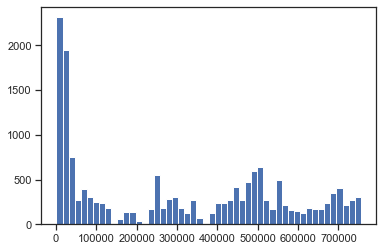

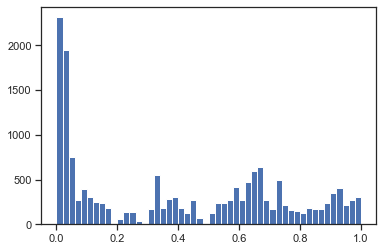

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,0.000866,13954,13953,3,1,4043.0,99,1962.0
1,0.008106,2327,2330,3,1,3360.0,503,1941.0
2,0.084535,15996,15999,3,1,3061.0,738,1974.0
3,0.001118,6771,6774,3,1,2961.0,521,1963.0
4,0.001903,14709,14709,3,1,2258.0,649,1950.0
...,...,...,...,...,...,...,...,...
16371,0.870375,12829,12831,3,1,1.0,480,1990.0
16372,0.880937,14585,14585,3,1,1.0,480,1990.0
16373,0.920370,14816,14816,3,1,1.0,480,1990.0
16374,0.938393,14335,14335,3,1,1.0,480,1990.0


In [82]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_new[['page_id']])

plt.hist(data_new['page_id'], 50)
plt.show()

plt.hist(sc1_data, 50)
plt.show()

data_new['page_id'] = sc1_data
data_new

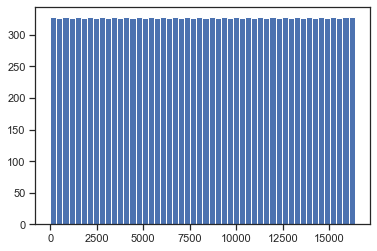

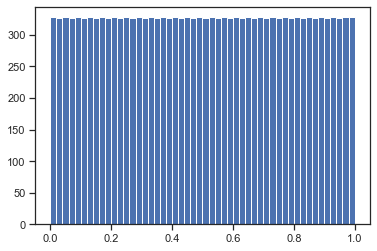

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,0.000866,0.852153,13953,3,1,4043.0,99,1962.0
1,0.008106,0.142107,2330,3,1,3360.0,503,1941.0
2,0.084535,0.976855,15999,3,1,3061.0,738,1974.0
3,0.001118,0.413496,6774,3,1,2961.0,521,1963.0
4,0.001903,0.898260,14709,3,1,2258.0,649,1950.0
...,...,...,...,...,...,...,...,...
16371,0.870375,0.783450,12831,3,1,1.0,480,1990.0
16372,0.880937,0.890687,14585,3,1,1.0,480,1990.0
16373,0.920370,0.904794,14816,3,1,1.0,480,1990.0
16374,0.938393,0.875420,14335,3,1,1.0,480,1990.0


In [83]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_new[['name']])

plt.hist(data_new['name'], 50)
plt.show()

plt.hist(sc1_data, 50)
plt.show()

data_new['name'] = sc1_data
data_new

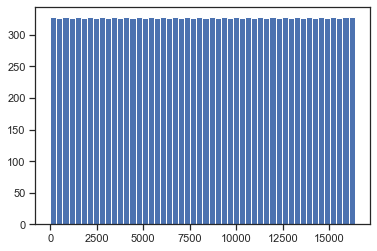

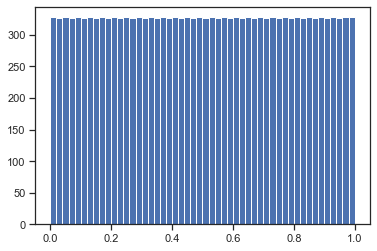

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,0.000866,0.852153,0.852092,3,1,4043.0,99,1962.0
1,0.008106,0.142107,0.142290,3,1,3360.0,503,1941.0
2,0.084535,0.976855,0.977038,3,1,3061.0,738,1974.0
3,0.001118,0.413496,0.413679,3,1,2961.0,521,1963.0
4,0.001903,0.898260,0.898260,3,1,2258.0,649,1950.0
...,...,...,...,...,...,...,...,...
16371,0.870375,0.783450,0.783573,3,1,1.0,480,1990.0
16372,0.880937,0.890687,0.890687,3,1,1.0,480,1990.0
16373,0.920370,0.904794,0.904794,3,1,1.0,480,1990.0
16374,0.938393,0.875420,0.875420,3,1,1.0,480,1990.0


In [84]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_new[['urlslug']])

plt.hist(data_new['urlslug'], 50)
plt.show()

plt.hist(sc1_data, 50)
plt.show()

data_new['urlslug'] = sc1_data
data_new

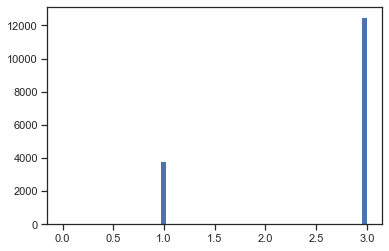

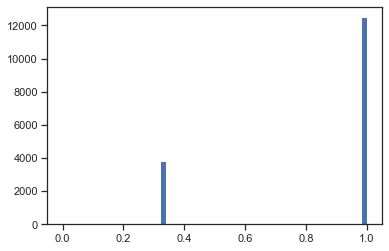

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,0.000866,0.852153,0.852092,1.0,1,4043.0,99,1962.0
1,0.008106,0.142107,0.142290,1.0,1,3360.0,503,1941.0
2,0.084535,0.976855,0.977038,1.0,1,3061.0,738,1974.0
3,0.001118,0.413496,0.413679,1.0,1,2961.0,521,1963.0
4,0.001903,0.898260,0.898260,1.0,1,2258.0,649,1950.0
...,...,...,...,...,...,...,...,...
16371,0.870375,0.783450,0.783573,1.0,1,1.0,480,1990.0
16372,0.880937,0.890687,0.890687,1.0,1,1.0,480,1990.0
16373,0.920370,0.904794,0.904794,1.0,1,1.0,480,1990.0
16374,0.938393,0.875420,0.875420,1.0,1,1.0,480,1990.0


In [85]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_new[['SEX']])

plt.hist(data_new['SEX'], 50)
plt.show()

plt.hist(sc1_data, 50)
plt.show()

data_new['SEX'] = sc1_data
data_new

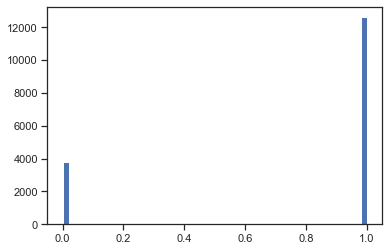

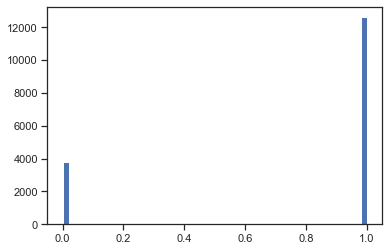

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,0.000866,0.852153,0.852092,1.0,1.0,4043.0,99,1962.0
1,0.008106,0.142107,0.142290,1.0,1.0,3360.0,503,1941.0
2,0.084535,0.976855,0.977038,1.0,1.0,3061.0,738,1974.0
3,0.001118,0.413496,0.413679,1.0,1.0,2961.0,521,1963.0
4,0.001903,0.898260,0.898260,1.0,1.0,2258.0,649,1950.0
...,...,...,...,...,...,...,...,...
16371,0.870375,0.783450,0.783573,1.0,1.0,1.0,480,1990.0
16372,0.880937,0.890687,0.890687,1.0,1.0,1.0,480,1990.0
16373,0.920370,0.904794,0.904794,1.0,1.0,1.0,480,1990.0
16374,0.938393,0.875420,0.875420,1.0,1.0,1.0,480,1990.0


In [86]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_new[['ALIVE']])

plt.hist(data_new['ALIVE'], 50)
plt.show()

plt.hist(sc1_data, 50)
plt.show()

data_new['ALIVE'] = sc1_data
data_new

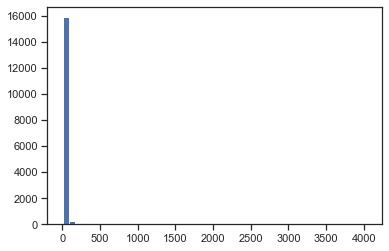

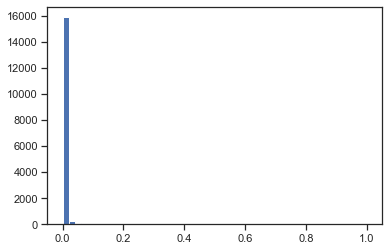

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,0.000866,0.852153,0.852092,1.0,1.0,1.000000,99,1962.0
1,0.008106,0.142107,0.142290,1.0,1.0,0.831024,503,1941.0
2,0.084535,0.976855,0.977038,1.0,1.0,0.757051,738,1974.0
3,0.001118,0.413496,0.413679,1.0,1.0,0.732311,521,1963.0
4,0.001903,0.898260,0.898260,1.0,1.0,0.558387,649,1950.0
...,...,...,...,...,...,...,...,...
16371,0.870375,0.783450,0.783573,1.0,1.0,0.000000,480,1990.0
16372,0.880937,0.890687,0.890687,1.0,1.0,0.000000,480,1990.0
16373,0.920370,0.904794,0.904794,1.0,1.0,0.000000,480,1990.0
16374,0.938393,0.875420,0.875420,1.0,1.0,0.000000,480,1990.0


In [87]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_new[['APPEARANCES']])

plt.hist(data_new['APPEARANCES'], 50)
plt.show()

plt.hist(sc1_data, 50)
plt.show()

data_new['APPEARANCES'] = sc1_data
data_new

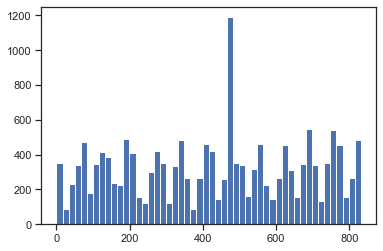

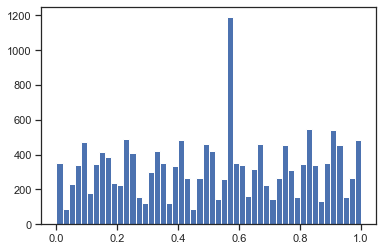

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,0.000866,0.852153,0.852092,1.0,1.0,1.000000,0.119134,1962.0
1,0.008106,0.142107,0.142290,1.0,1.0,0.831024,0.605295,1941.0
2,0.084535,0.976855,0.977038,1.0,1.0,0.757051,0.888087,1974.0
3,0.001118,0.413496,0.413679,1.0,1.0,0.732311,0.626955,1963.0
4,0.001903,0.898260,0.898260,1.0,1.0,0.558387,0.780987,1950.0
...,...,...,...,...,...,...,...,...
16371,0.870375,0.783450,0.783573,1.0,1.0,0.000000,0.577617,1990.0
16372,0.880937,0.890687,0.890687,1.0,1.0,0.000000,0.577617,1990.0
16373,0.920370,0.904794,0.904794,1.0,1.0,0.000000,0.577617,1990.0
16374,0.938393,0.875420,0.875420,1.0,1.0,0.000000,0.577617,1990.0


In [88]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_new[['FIRST APPEARANCE']])

plt.hist(data_new['FIRST APPEARANCE'], 50)
plt.show()

plt.hist(sc1_data, 50)
plt.show()

data_new['FIRST APPEARANCE'] = sc1_data
data_new

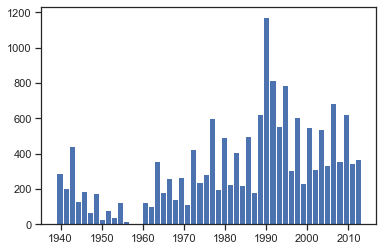

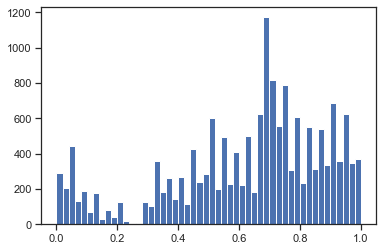

,page_id,name,urlslug,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,0.000866,0.852153,0.852092,1.0,1.0,1.000000,0.119134,0.310811
1,0.008106,0.142107,0.142290,1.0,1.0,0.831024,0.605295,0.027027
2,0.084535,0.976855,0.977038,1.0,1.0,0.757051,0.888087,0.472973
3,0.001118,0.413496,0.413679,1.0,1.0,0.732311,0.626955,0.324324
4,0.001903,0.898260,0.898260,1.0,1.0,0.558387,0.780987,0.148649
...,...,...,...,...,...,...,...,...
16371,0.870375,0.783450,0.783573,1.0,1.0,0.000000,0.577617,0.689189
16372,0.880937,0.890687,0.890687,1.0,1.0,0.000000,0.577617,0.689189
16373,0.920370,0.904794,0.904794,1.0,1.0,0.000000,0.577617,0.689189
16374,0.938393,0.875420,0.875420,1.0,1.0,0.000000,0.577617,0.689189


In [89]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_new[['Year']])

plt.hist(data_new['Year'], 50)
plt.show()

plt.hist(sc1_data, 50)
plt.show()

data_new['Year'] = sc1_data
data_new